In [8]:
'''
손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측

total_bill : 테이블의 전체 지불 금액
tip : 팁으로 낸 금액
sex : 계산한 손님의 성별
smoker : 손님 중 흡연자 포함 여부
day : 요일
time : 시간
size : 테이블 인원수
'''
import seaborn as sns
sns.get_dataset_names()
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()


(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
'''
pandas - get_dummies 
원-핫 인코딩(One Hot Encoding)
문자열 데이터를 0, 1 값의 컬럼으로 변환
'''
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

tips.head()


,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [10]:
'''
이번에는 x가 한 개가 아닌, 12개
선형 방정식 - 다변수 일차방정식
y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7x7 + w8x8 + w9x9 + w10x10 + w11x11 + w12x12 +b
상수 b를 없애고 x0 = 1 로 표현 가능
y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7x7 + w8x8 + w9x9 + w10x10 + w11x11 + w12x12

선형 회귀
    선형 방정식을 활용해서 원하는 값을 예측하는 모델을 설계하고 학습시키는 방법
    
만약 입력 데이터가 두 개이면 3차원 공간에 시각화 
입력 데이터 x가 3개 이상으로 늘어난다면 우리는 더이상 시각화를 할 수가 없다
    >> 12개의 값을 가지는 벡터X로 
'''
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values


from sklearn.model_selection import train_test_split
# sklearn - train_test_split 학습/테스트 데이터를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 파라메터: W 백터, b 상수
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

# 모델 함수
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# MSE 계산
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

# 손실함수
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# 기울기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
        
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)


(195, 12) (195,)
(49, 12) (49,)
dW: [849.29772729 101.7899384   24.57313293  11.86708936  14.63517095
  21.80505134   8.42297567   2.59351109  13.25879374  12.16494179
   9.03394683  27.40627545]
db: 36.44022228720449


Iteration 10 : Loss 50.7390
Iteration 20 : Loss 7.8931
Iteration 30 : Loss 2.5537
Iteration 40 : Loss 1.8872
Iteration 50 : Loss 1.8030
Iteration 60 : Loss 1.7913
Iteration 70 : Loss 1.7887
Iteration 80 : Loss 1.7872
Iteration 90 : Loss 1.7858
Iteration 100 : Loss 1.7844
Iteration 110 : Loss 1.7831
Iteration 120 : Loss 1.7818
Iteration 130 : Loss 1.7804
Iteration 140 : Loss 1.7791
Iteration 150 : Loss 1.7778
Iteration 160 : Loss 1.7765
Iteration 170 : Loss 1.7752
Iteration 180 : Loss 1.7739
Iteration 190 : Loss 1.7726
Iteration 200 : Loss 1.7713
Iteration 210 : Loss 1.7700
Iteration 220 : Loss 1.7687
Iteration 230 : Loss 1.7674
Iteration 240 : Loss 1.7661
Iteration 250 : Loss 1.7648
Iteration 260 : Loss 1.7635
Iteration 270 : Loss 1.7623
Iteration 280 : Loss 1.7610
Iteration 290 : Loss 1.7597
Iteration 300 : Loss 1.7585
Iteration 310 : Loss 1.7572
Iteration 320 : Loss 1.7559
Iteration 330 : Loss 1.7547
Iteration 340 : Loss 1.7534
Iteration 350 : Loss 1.7522
Iteration 360 : Loss 1.7510


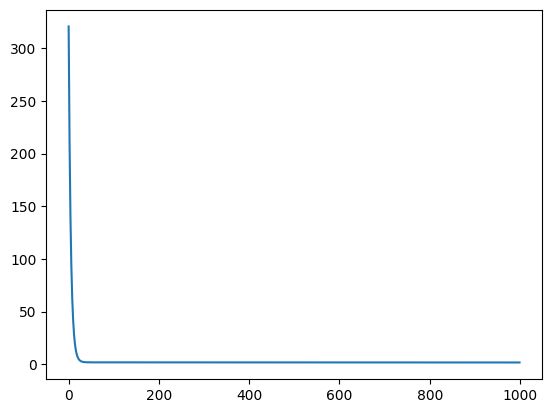

mse: 1.2019899928199815


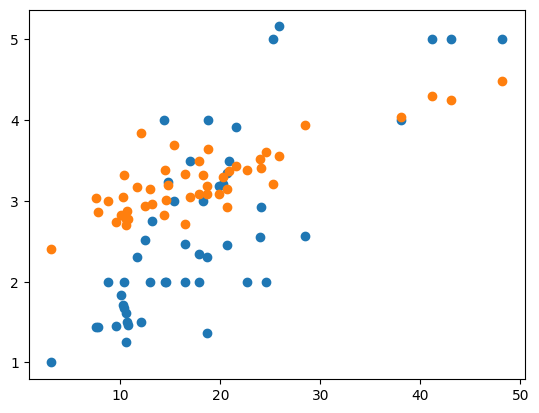

In [11]:
LEARNING_RATE = 0.0001
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('mse:', mse)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()


mse: 0.7033566017436103


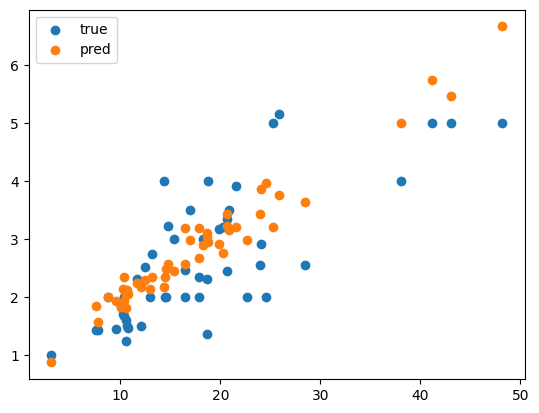

In [12]:
'''
sklearn 선형 회귀 모델 LinearRegression 
'''
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
# 모델 생성
model = LinearRegression()

# 학습
model.fit(X_train, y_train)

# 테스트
predictions = model.predict(X_test)

# 모델의 성능 mse 계산 : sklearn.metrics - mean_squared_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('mse:', mse)

# 시각화
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()